In [45]:
import pandas as pd
data1=pd.read_csv("./stack-overflow-developer-survey-2023/survey_results_public.csv")
data2=pd.read_csv("./stack-overflow-developer-survey-2022/survey_results_public.csv")
data3=pd.read_csv("./stack-overflow-developer-survey-2021/survey_results_public.csv")
data4=pd.read_csv("./stack-overflow-developer-survey-2020/survey_results_public.csv")
data5=pd.read_csv("./stack-overflow-developer-survey-2019/survey_results_public.csv")
data6=pd.read_csv("./stack-overflow-developer-survey-2018/survey_results_public.csv")
# 포함할 학위 리스트
degree_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "Ph.D"
}


data1['EdLevel'] = data1['EdLevel'].map(degree_mapping)
data2['EdLevel'] = data2['EdLevel'].map(degree_mapping)
data3['EdLevel'] = data3['EdLevel'].map(degree_mapping)
data4['EdLevel'] = data4['EdLevel'].map(degree_mapping)
data5['EdLevel'] = data5['EdLevel'].map(degree_mapping)

filtered_df1 = data1[data1['EdLevel'].isin(degree_mapping.values())]
filtered_df2 = data2[data2['EdLevel'].isin(degree_mapping.values())]
filtered_df3 = data3[data3['EdLevel'].isin(degree_mapping.values())]
filtered_df4 = data4[data4['EdLevel'].isin(degree_mapping.values())]
filtered_df5 = data5[data5['EdLevel'].isin(degree_mapping.values())]


ffilterd_df1=filtered_df1[["EdLevel","DevType","LanguageHaveWorkedWith","DatabaseHaveWorkedWith","PlatformHaveWorkedWith","ConvertedCompYearly"]]
ffilterd_df2=filtered_df2[["EdLevel","DevType","LanguageHaveWorkedWith","DatabaseHaveWorkedWith","PlatformHaveWorkedWith","ConvertedCompYearly"]]
ffilterd_df3=filtered_df3[["EdLevel","DevType","LanguageHaveWorkedWith","DatabaseHaveWorkedWith","PlatformHaveWorkedWith","ConvertedCompYearly"]]
ffilterd_df4=filtered_df4[["EdLevel","DevType","LanguageWorkedWith","DatabaseWorkedWith","PlatformWorkedWith","ConvertedComp"]]
ffilterd_df4=ffilterd_df4.rename(columns={"LanguageWorkedWith":"LanguageHaveWorkedWith","DatabaseWorkedWith":"DatabaseHaveWorkedWith",
                                          "PlatformWorkedWith":"PlatformHaveWorkedWith","ConvertedComp":"ConvertedCompYearly"})
ffilterd_df5=filtered_df5[["EdLevel","DevType","LanguageWorkedWith","DatabaseWorkedWith","PlatformWorkedWith","ConvertedComp"]]
ffilterd_df5=ffilterd_df5.rename(columns={"LanguageWorkedWith":"LanguageHaveWorkedWith","DatabaseWorkedWith":"DatabaseHaveWorkedWith",
                                          "PlatformWorkedWith":"PlatformHaveWorkedWith","ConvertedComp":"ConvertedCompYearly"})

ffilterd_df1=ffilterd_df1.dropna()
ffilterd_df2=ffilterd_df2.dropna()
ffilterd_df3=ffilterd_df3.dropna()
ffilterd_df4=ffilterd_df4.dropna()
ffilterd_df5=ffilterd_df5.dropna()

ffilterd_df1=ffilterd_df1.reset_index(drop=True)
ffilterd_df2=ffilterd_df2.reset_index(drop=True)
ffilterd_df3=ffilterd_df3.reset_index(drop=True)
ffilterd_df4=ffilterd_df4.reset_index(drop=True)
ffilterd_df5=ffilterd_df5.reset_index(drop=True)
filtered=pd.concat([ffilterd_df1,ffilterd_df2,ffilterd_df3,ffilterd_df4,ffilterd_df5])
filtered.to_csv("filtered.csv")

/tmp/ipykernel_786721/390864617.py:7: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data6=pd.read_csv("./stack-overflow-developer-survey-2018/survey_results_public.csv")


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, udf
from pyspark.sql.types import StringType

# Create a SparkSession
spark = SparkSession.builder.appName("StackOverflowSurvey").getOrCreate()

# Load the CSV files as DataFrames
data1 = spark.read.csv("/home/airlab1tb/다운로드/빅데/stack-overflow-developer-survey-2023/survey_results_public.csv", header=True, inferSchema=True)
data2 = spark.read.csv("/home/airlab1tb/다운로드/빅데/stack-overflow-developer-survey-2022/survey_results_public.csv", header=True, inferSchema=True)
data3 = spark.read.csv("/home/airlab1tb/다운로드/빅데/stack-overflow-developer-survey-2021/survey_results_public.csv", header=True, inferSchema=True)
data4 = spark.read.csv("/home/airlab1tb/다운로드/빅데/stack-overflow-developer-survey-2020/survey_results_public.csv", header=True, inferSchema=True)
data5 = spark.read.csv("/home/airlab1tb/다운로드/빅데/stack-overflow-developer-survey-2019/survey_results_public.csv", header=True, inferSchema=True)
data6 = spark.read.csv("/home/airlab1tb/다운로드/빅데/stack-overflow-developer-survey-2018/survey_results_public.csv", header=True, inferSchema=True)

# Define the degree mapping
degree_mapping = {
    "Bachelor's degree (B.A., B.S., B.Eng., etc.)": "Bachelor",
    "Master's degree (M.A., M.S., M.Eng., MBA, etc.)": "Master",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "Ph.D"
}

# Create a UDF for mapping
map_degree = udf(lambda x: degree_mapping.get(x, x), StringType())

# Map the EdLevel column using the UDF
data1 = data1.withColumn("EdLevel", map_degree(col("EdLevel")))
data2 = data2.withColumn("EdLevel", map_degree(col("EdLevel")))
data3 = data3.withColumn("EdLevel", map_degree(col("EdLevel")))
data4 = data4.withColumn("EdLevel", map_degree(col("EdLevel")))
data5 = data5.withColumn("EdLevel", map_degree(col("EdLevel")))

# Filter the DataFrames based on the mapped EdLevel values
filtered_df1 = data1.filter(col("EdLevel").isin([value for value in degree_mapping.values()]))
filtered_df2 = data2.filter(col("EdLevel").isin([value for value in degree_mapping.values()]))
filtered_df3 = data3.filter(col("EdLevel").isin([value for value in degree_mapping.values()]))
filtered_df4 = data4.filter(col("EdLevel").isin([value for value in degree_mapping.values()]))
filtered_df5 = data5.filter(col("EdLevel").isin([value for value in degree_mapping.values()]))

# Select the required columns
ffilterd_df1 = filtered_df1.select("EdLevel", "DevType", "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "ConvertedCompYearly")
ffilterd_df2 = filtered_df2.select("EdLevel", "DevType", "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "ConvertedCompYearly")
ffilterd_df3 = filtered_df3.select("EdLevel", "DevType", "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "ConvertedCompYearly")
ffilterd_df4 = filtered_df4.select("EdLevel", "DevType", col("LanguageWorkedWith").alias("LanguageHaveWorkedWith"), col("DatabaseWorkedWith").alias("DatabaseHaveWorkedWith"), col("PlatformWorkedWith").alias("PlatformHaveWorkedWith"), col("ConvertedComp").alias("ConvertedCompYearly"))
ffilterd_df5 = filtered_df5.select("EdLevel", "DevType", col("LanguageWorkedWith").alias("LanguageHaveWorkedWith"), col("DatabaseWorkedWith").alias("DatabaseHaveWorkedWith"), col("PlatformWorkedWith").alias("PlatformHaveWorkedWith"), col("ConvertedComp").alias("ConvertedCompYearly"))

# Drop rows with null values
ffilterd_df1 = ffilterd_df1.dropna()
ffilterd_df2 = ffilterd_df2.dropna()
ffilterd_df3 = ffilterd_df3.dropna()
ffilterd_df4 = ffilterd_df4.dropna()
ffilterd_df5 = ffilterd_df5.dropna()

# Concatenate the DataFrames
filtered = ffilterd_df1.union(ffilterd_df2).union(ffilterd_df3).union(ffilterd_df4).union(ffilterd_df5)

filtered.coalesce(1).write.option("header", "true").mode("overwrite").csv("filtered.csv")

24/06/07 09:03:40 WARN Utils: Your hostname, airlab1tb-MS-7C94 resolves to a loopback address: 127.0.1.1; using 163.180.143.49 instead (on interface enp42s0)
24/06/07 09:03:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/07 09:03:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/home/airlab1tb/다운로드/빅데/stack-overflow-developer-survey-2023/survey_results_public.csv.

In [42]:
filtered

,EdLevel,DevType,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,ConvertedCompYearly
0,Bachelor,"Senior Executive (C-Suite, VP, etc.)",HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,285000.0
1,Bachelor,"Developer, front-end",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Cloudflare;Heroku,156000.0
2,Bachelor,"Developer, full-stack",HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,23456.0
3,Bachelor,"Developer, full-stack",Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,Dynamodb;MongoDB;MySQL;Redis;SQLite,Amazon Web Services (AWS);Fly.io;Netlify;Vercel,80000.0
4,Master,System administrator,C#;JavaScript;PowerShell;Ruby;TypeScript,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Digital Ocean;Microsoft Azure;Netlify,64254.0
...,...,...,...,...,...,...
3556,Ph.D,"Developer, full-stack;Scientist;Senior executi...",C++;C#;F#;HTML/CSS;Java;JavaScript;Kotlin;Pyth...,Firebase;MariaDB;MongoDB;Microsoft SQL Server;...,AWS;Docker;Google Cloud Platform;Linux;MacOS;M...,170000.0
3557,Ph.D,"Developer, back-end;Developer, embedded applic...",Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,MariaDB;MySQL;PostgreSQL,Linux;Windows,732852.0
3558,Ph.D,"Developer, back-end;Developer, front-end;Devel...",HTML/CSS;Java;JavaScript;PHP;Python;SQL;TypeSc...,Microsoft SQL Server;PostgreSQL,AWS;Linux;Slack;Windows,23376.0
3559,Ph.D,"Developer, desktop or enterprise applications;...",Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScri...,MySQL,Linux,57287.0


In [46]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, split, explode
import matplotlib.pyplot as plt

# SparkSession 생성
spark = SparkSession.builder \
    .appName("CSV Example") \
    .getOrCreate()

csv_file_path = "filtered.csv"

# CSV 파일 불러오기
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

24/06/07 09:21:56 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+----------------+------------------+
|EdLevel         |AverageSalary     |
+----------------+------------------+
|Ph.D            |176374.41360787823|
|Bachelor        |131115.74516063646|
|Master          |119912.7059873985 |
|Secondary school|98247.98929390773 |
+----------------+------------------+



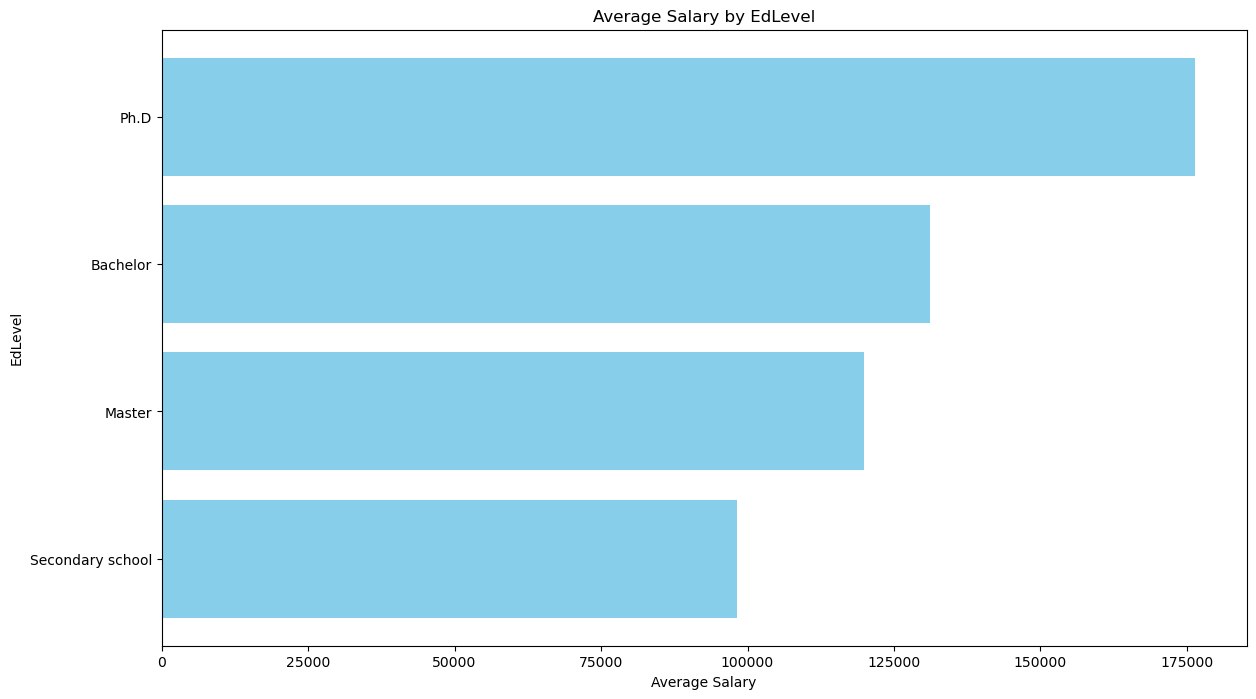

In [47]:
# EdLevel별 평균 연봉 계산
average_salary_df = df.groupBy("EdLevel").agg(avg("ConvertedCompYearly").alias("AverageSalary"))
average_salary_df = average_salary_df.orderBy(average_salary_df["AverageSalary"].desc())

# 결과 출력
average_salary_df.show(average_salary_df.count(), truncate=False)
pandas_df = average_salary_df.toPandas()
pandas_df = pandas_df.sort_values(by="AverageSalary", ascending=False)
plt.figure(figsize=(14, 8))
plt.barh(pandas_df['EdLevel'], pandas_df['AverageSalary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('EdLevel')
plt.title('Average Salary by EdLevel')
plt.gca().invert_yaxis()
plt.show()

pandas_df.to_csv("school_income.csv")

+---------------------------------------------+------------------+
|DevType                                      |AverageSalary     |
+---------------------------------------------+------------------+
|Blockchain                                   |326667.3752345216 |
|Senior Executive (C-Suite, VP, etc.)         |254768.74962742176|
|Cloud infrastructure engineer                |242861.34894687205|
|Marketing or sales professional              |208679.6493256262 |
|Project manager                              |202163.70798319328|
|Security professional                        |189090.368286445  |
|Engineering manager                          |188528.87315120932|
|Engineer, site reliability                   |184478.2965374371 |
|Other (please specify):                      |163259.0927030748 |
|Senior executive/VP                          |150264.40184049078|
|Developer, embedded applications or devices  |149522.8700265252 |
|DevOps specialist                            |147508.44347826

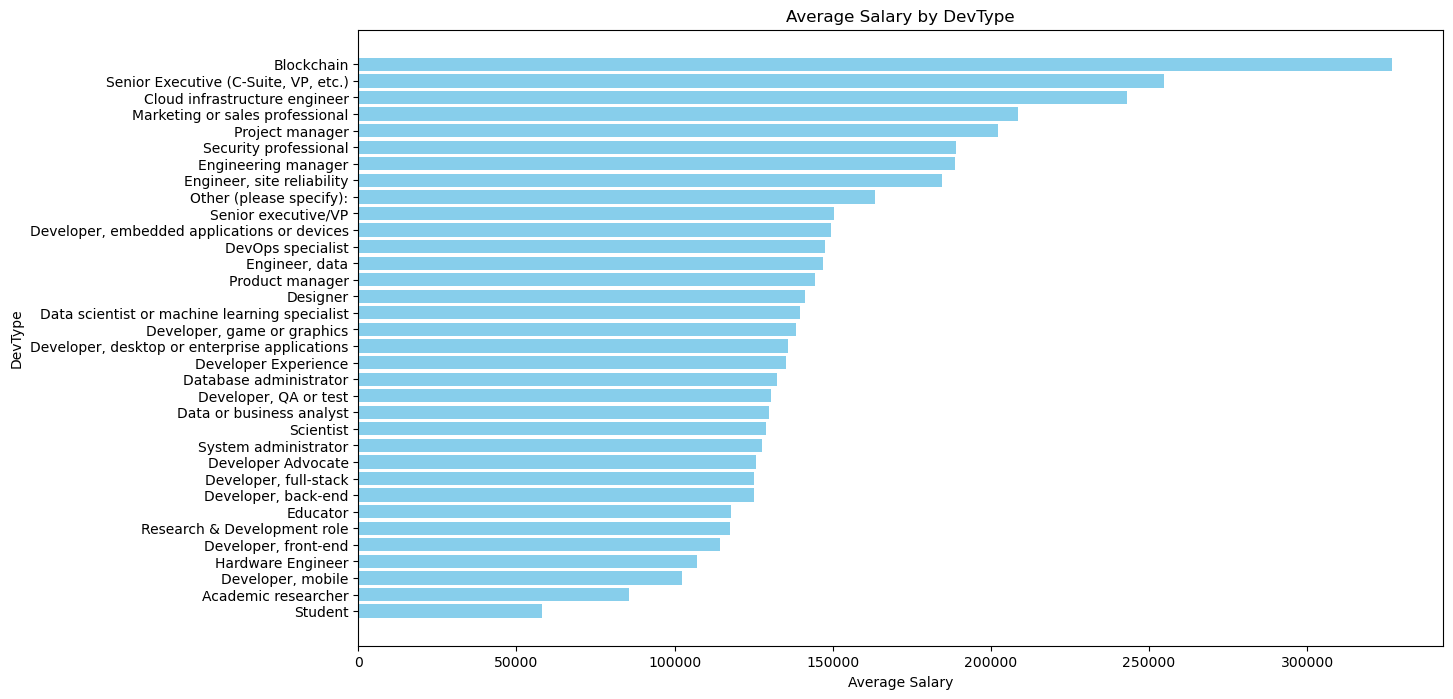

In [48]:
# DevType 컬럼을 분리하여 배열로 변환
df = df.withColumn("DevType", split(df["DevType"], ";"))

# 배열을 행으로 확장
df = df.withColumn("DevType", explode(df["DevType"]))

# 결과 확인
# DevType별 평균 연봉 계산
average_salary_df = df.groupBy("DevType").agg(avg("ConvertedCompYearly").alias("AverageSalary"))
average_salary_df = average_salary_df.orderBy(average_salary_df["AverageSalary"].desc())

# 결과 출력
average_salary_df.show(average_salary_df.count(), truncate=False)
pandas_df = average_salary_df.toPandas()
pandas_df = pandas_df.sort_values(by="AverageSalary", ascending=False)
plt.figure(figsize=(14, 8))
plt.barh(pandas_df['DevType'], pandas_df['AverageSalary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('DevType')
plt.title('Average Salary by DevType')
plt.gca().invert_yaxis()
plt.show()

+-----------------------+------------------+
|LanguageHaveWorkedWith |AverageSalary     |
+-----------------------+------------------+
|OCaml                  |2661372.9031477   |
|SAS                    |2547688.212723658 |
|APL                    |2295054.0036101085|
|Fortran                |2199190.3732394367|
|COBOL                  |1446567.3475609757|
|Crystal                |1269961.6033578175|
|LISP                   |1018436.4579804561|
|Ada                    |928229.6261682243 |
|Solidity               |830094.7877813504 |
|Julia                  |811539.8034985423 |
|Cobol                  |780069.2049180327 |
|Erlang                 |710943.1581395349 |
|F#                     |669942.4888337469 |
|Prolog                 |546686.0503144654 |
|MATLAB                 |515127.4872       |
|Lua                    |481429.17647058825|
|Delphi                 |438085.98376544705|
|Haskell                |411346.6734006734 |
|Groovy                 |367862.82082928857|
|Lisp     

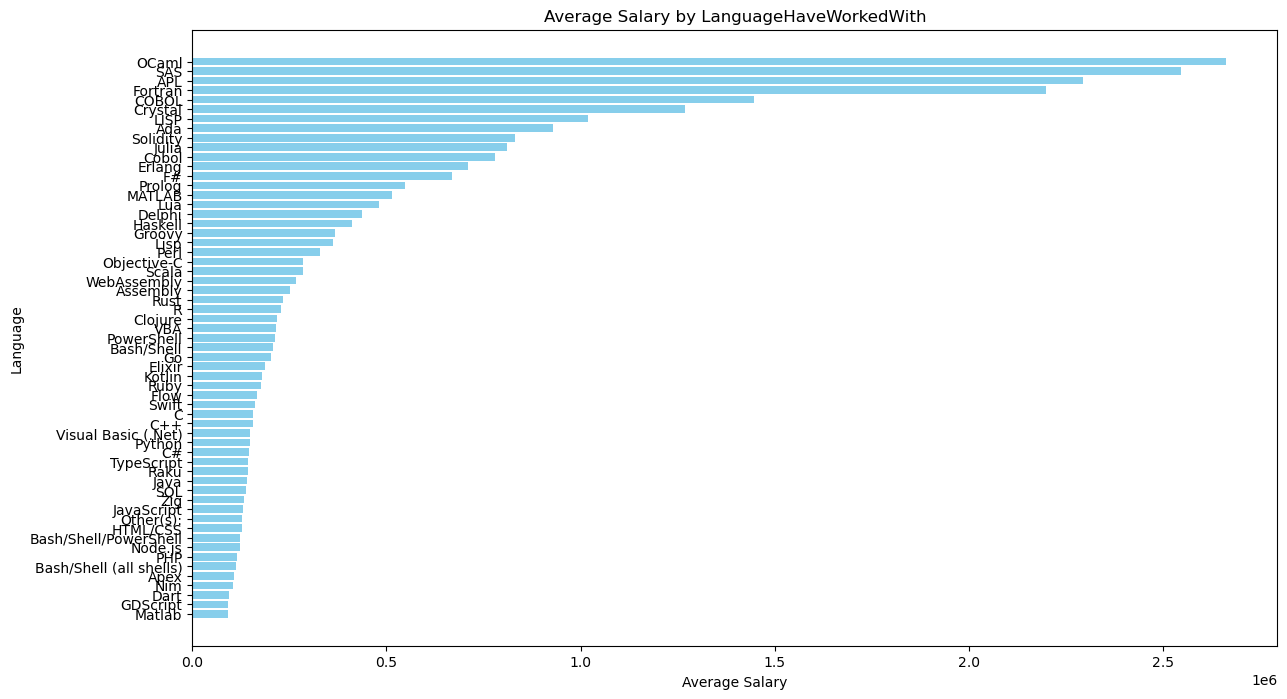

In [49]:
# DevType 컬럼을 분리하여 배열로 변환
df = df.withColumn("LanguageHaveWorkedWith", split(df["LanguageHaveWorkedWith"], ";"))

# 배열을 행으로 확장
df = df.withColumn("LanguageHaveWorkedWith", explode(df["LanguageHaveWorkedWith"]))

# 결과 확인
# DevType별 평균 연봉 계산
average_salary_df = df.groupBy("LanguageHaveWorkedWith").agg(avg("ConvertedCompYearly").alias("AverageSalary"))
average_salary_df = average_salary_df.orderBy(average_salary_df["AverageSalary"].desc())

# 결과 출력
average_salary_df.show(average_salary_df.count(), truncate=False)
pandas_df = average_salary_df.toPandas()
pandas_df = pandas_df.sort_values(by="AverageSalary", ascending=False)
plt.figure(figsize=(14, 8))
plt.barh(pandas_df['LanguageHaveWorkedWith'], pandas_df['AverageSalary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Language')
plt.title('Average Salary by LanguageHaveWorkedWith')
plt.gca().invert_yaxis()
plt.show()

pandas_df.to_csv("language_income.csv")

+--------------------------+------------------+
|DatabaseHaveWorkedWith    |AverageSalary     |
+--------------------------+------------------+
|CouchDB                   |3440396.286375884 |
|Neo4j                     |3008224.1218991536|
|Couchbase                 |1203025.2637461   |
|IBM DB2                   |1016104.0347399696|
|Cloud Firestore           |940290.7723725232 |
|Firebase Realtime Database|902001.3298149809 |
|Cassandra                 |804865.6700470513 |
|Firebird                  |774587.2489229296 |
|DynamoDB                  |446599.46413774224|
|Oracle                    |310728.67858170375|
|Microsoft Access          |287132.37981227046|
|Redis                     |247743.95673945482|
|MariaDB                   |238059.43897293872|
|Microsoft SQL Server      |220721.56673579896|
|MongoDB                   |206026.98857178303|
|SQLite                    |205239.0363787319 |
|PostgreSQL                |198317.22036563142|
|MySQL                     |175848.28390

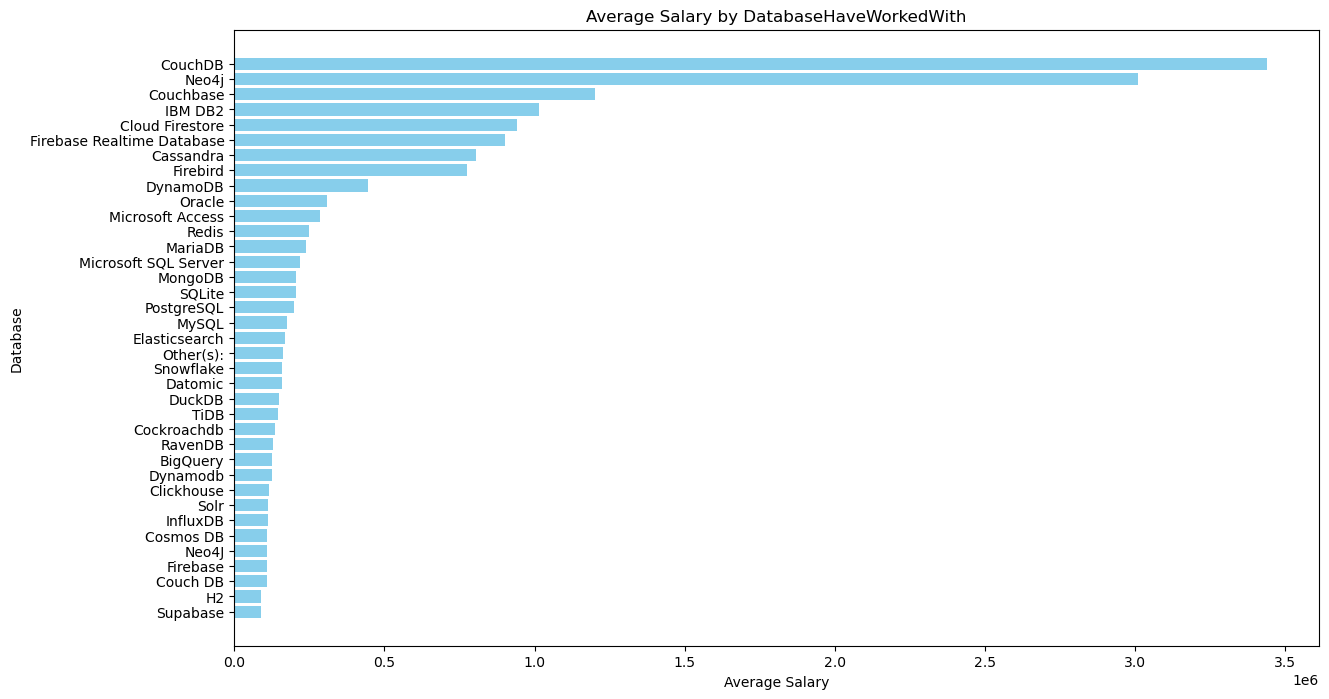

In [50]:
# DevType 컬럼을 분리하여 배열로 변환
df = df.withColumn("DatabaseHaveWorkedWith", split(df["DatabaseHaveWorkedWith"], ";"))

# 배열을 행으로 확장
df = df.withColumn("DatabaseHaveWorkedWith", explode(df["DatabaseHaveWorkedWith"]))

# 결과 확인
# DevType별 평균 연봉 계산
average_salary_df = df.groupBy("DatabaseHaveWorkedWith").agg(avg("ConvertedCompYearly").alias("AverageSalary"))
average_salary_df = average_salary_df.orderBy(average_salary_df["AverageSalary"].desc())

# 결과 출력
average_salary_df.show(average_salary_df.count(), truncate=False)
pandas_df = average_salary_df.toPandas()
pandas_df = pandas_df.sort_values(by="AverageSalary", ascending=False)
plt.figure(figsize=(14, 8))
plt.barh(pandas_df['DatabaseHaveWorkedWith'], pandas_df['AverageSalary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Database')
plt.title('Average Salary by DatabaseHaveWorkedWith')
plt.gca().invert_yaxis()
plt.show()

pandas_df.to_csv("database_income.csv")

+---------------------------------+------------------+
|PlatformHaveWorkedWith           |AverageSalary     |
+---------------------------------+------------------+
|Colocation                       |7544561.615364217 |
|Linode                           |5707414.446185008 |
|OpenStack                        |5265138.689353377 |
|Oracle Cloud Infrastructure      |5007708.503522545 |
|OVH                              |3853547.7764324807|
|Managed Hosting                  |3175212.447807948 |
|IBM Cloud or Watson              |2691101.5422420367|
|VMware                           |2250660.6457689353|
|Firebase                         |1313019.4583237064|
|Google Cloud                     |1031759.3418790002|
|Heroku                           |665854.0360623212 |
|Microsoft Azure                  |500300.1479698648 |
|AWS                              |402729.8066913141 |
|Other(s):                        |242520.98269462018|
|Slack                            |236101.916745031  |
|Cloudflar

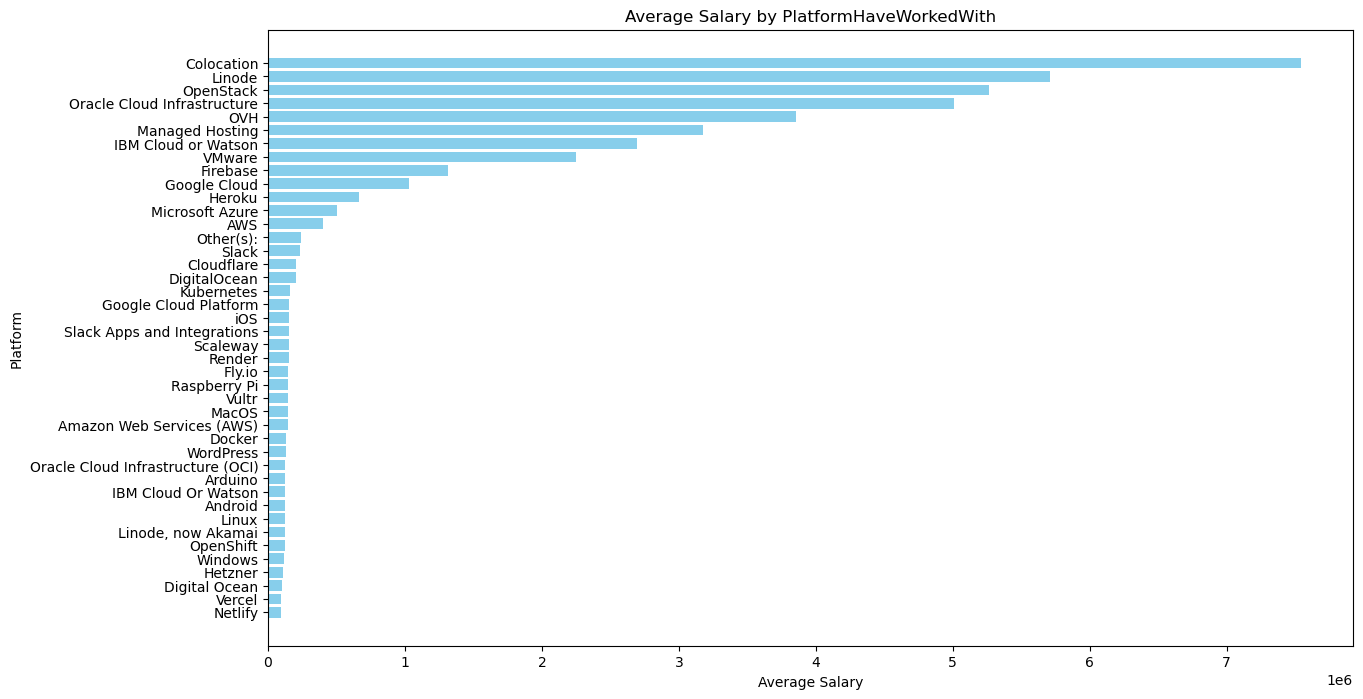

In [51]:
# DevType 컬럼을 분리하여 배열로 변환
df = df.withColumn("PlatformHaveWorkedWith", split(df["PlatformHaveWorkedWith"], ";"))

# 배열을 행으로 확장
df = df.withColumn("PlatformHaveWorkedWith", explode(df["PlatformHaveWorkedWith"]))

# 결과 확인
# DevType별 평균 연봉 계산
average_salary_df = df.groupBy("PlatformHaveWorkedWith").agg(avg("ConvertedCompYearly").alias("AverageSalary"))
average_salary_df = average_salary_df.orderBy(average_salary_df["AverageSalary"].desc())

# 결과 출력
average_salary_df.show(average_salary_df.count(), truncate=False)
pandas_df = average_salary_df.toPandas()
pandas_df = pandas_df.sort_values(by="AverageSalary", ascending=False)
plt.figure(figsize=(14, 8))
plt.barh(pandas_df['PlatformHaveWorkedWith'], pandas_df['AverageSalary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Platform')
plt.title('Average Salary by PlatformHaveWorkedWith')
plt.gca().invert_yaxis()
plt.show()

pandas_df.to_csv("platform_income.csv")

In [55]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, col, count
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Spark 세션 생성
spark = SparkSession.builder \
    .appName("DevType Rankings") \
    .getOrCreate()

# CSV 파일 로드
df = spark.read.option("header", "true").csv("filtered.csv")

# DevType 필드 분리 및 변환
df = df.select(
    col("EdLevel"),
    explode(split(col("DevType"), ";")).alias("DevType"),
    col("LanguageHaveWorkedWith"),
    col("DatabaseHaveWorkedWith"),
    col("PlatformHaveWorkedWith"),
    col("ConvertedCompYearly")
)

# Language 필드 분리 및 변환
df_languages = df.select(
    col("DevType"),
    explode(split(col("LanguageHaveWorkedWith"), ";")).alias("Language")
)

# Database 필드 분리 및 변환
df_databases = df.select(
    col("DevType"),
    explode(split(col("DatabaseHaveWorkedWith"), ";")).alias("Database")
)

# Platform 필드 분리 및 변환
df_platforms = df.select(
    col("DevType"),
    explode(split(col("PlatformHaveWorkedWith"), ";")).alias("Platform")
)

# Language 순위 계산
language_window = Window.partitionBy("DevType").orderBy(col("Count").desc())
language_rankings = df_languages.groupBy("DevType", "Language") \
    .agg(count("Language").alias("Count")) \
    .withColumn("Rank", row_number().over(language_window)) \
    .orderBy("DevType", "Rank")

# Database 순위 계산
database_window = Window.partitionBy("DevType").orderBy(col("Count").desc())
database_rankings = df_databases.groupBy("DevType", "Database") \
    .agg(count("Database").alias("Count")) \
    .withColumn("Rank", row_number().over(database_window)) \
    .orderBy("DevType", "Rank")

# Platform 순위 계산
platform_window = Window.partitionBy("DevType").orderBy(col("Count").desc())
platform_rankings = df_platforms.groupBy("DevType", "Platform") \
    .agg(count("Platform").alias("Count")) \
    .withColumn("Rank", row_number().over(platform_window)) \
    .orderBy("DevType", "Rank")

pd_language_rankings = language_rankings.toPandas()
pd_database_rankings = database_rankings.toPandas()
pd_platform_rankings = platform_rankings.toPandas()

# Pandas DataFrame을 CSV 파일로 저장
pd_language_rankings.to_csv("devtype_language.csv", index=False)
pd_database_rankings.to_csv("devtype_database.csv", index=False)
pd_platform_rankings.to_csv("devtype_platform.csv", index=False)


In [56]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, col, count

# Spark 세션 생성
spark = SparkSession.builder \
    .appName("Tech Usage Rankings") \
    .getOrCreate()

# CSV 파일 로드
df = spark.read.option("header", "true").csv("filtered.csv")

# DevType 필드 분리 및 변환
df = df.select(
    col("EdLevel"),
    explode(split(col("DevType"), ";")).alias("DevType"),
    col("LanguageHaveWorkedWith"),
    col("DatabaseHaveWorkedWith"),
    col("PlatformHaveWorkedWith"),
    col("ConvertedCompYearly")
)

# Language 필드 분리 및 변환
df_languages = df.select(
    col("LanguageHaveWorkedWith"),
    explode(split(col("LanguageHaveWorkedWith"), ";")).alias("Language"),
    col("DevType")
)

# Database 필드 분리 및 변환
df_databases = df.select(
    col("DatabaseHaveWorkedWith"),
    explode(split(col("DatabaseHaveWorkedWith"), ";")).alias("Database"),
    col("DevType")
)

# Platform 필드 분리 및 변환
df_platforms = df.select(
    col("PlatformHaveWorkedWith"),
    explode(split(col("PlatformHaveWorkedWith"), ";")).alias("Platform"),
    col("DevType")
)

from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Language 순위 계산
devtype_window = Window.partitionBy("Language").orderBy(col("Count").desc())
language_rankings = df_languages.groupBy("Language", "DevType") \
    .agg(count("DevType").alias("Count")) \
    .withColumn("Rank", row_number().over(devtype_window)) \
    .orderBy("Language", "Rank")

# Database 순위 계산
devtype_window = Window.partitionBy("Database").orderBy(col("Count").desc())
database_rankings = df_databases.groupBy("Database", "DevType") \
    .agg(count("DevType").alias("Count")) \
    .withColumn("Rank", row_number().over(devtype_window)) \
    .orderBy("Database", "Rank")

# Platform 순위 계산
devtype_window = Window.partitionBy("Platform").orderBy(col("Count").desc())
platform_rankings = df_platforms.groupBy("Platform", "DevType") \
    .agg(count("DevType").alias("Count")) \
    .withColumn("Rank", row_number().over(devtype_window)) \
    .orderBy("Platform", "Rank")

import pandas as pd

# PySpark DataFrame을 Pandas DataFrame으로 변환
pd_language_rankings = language_rankings.toPandas()
pd_database_rankings = database_rankings.toPandas()
pd_platform_rankings = platform_rankings.toPandas()

# Pandas DataFrame을 CSV 파일로 저장
pd_language_rankings.to_csv("language_devtype_rankings.csv", index=False)
pd_database_rankings.to_csv("database_devtype_rankings.csv", index=False)
pd_platform_rankings.to_csv("platform_devtype_rankings.csv", index=False)

24/06/07 09:27:19 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
